# 1. EDA

## 1-1 Load Data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from collections import Counter
import numpy as np

In [29]:
# 폰트 설정
mpl.rcParams['font.family'] = 'AppleGothic'  # 또는 'Apple SD Gothic Neo'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 부호가 깨지는 현상 방지

In [2]:
os.makedirs("plots", exist_ok=True)

In [24]:
data = pd.read_csv("../data/train.csv")

In [5]:
data.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32470 non-null  int64 
 1   sentence        32470 non-null  object
 2   subject_entity  32470 non-null  object
 3   object_entity   32470 non-null  object
 4   label           32470 non-null  object
 5   source          32470 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


## 1-2 label 분포 확인

### 분포 확인

In [7]:
label_counts = data['label'].value_counts()
print(label_counts)

label
no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product               

In [8]:
no_relation_ratio = label_counts["no_relation"] / len(data)
print(f"no_relation ratio: {no_relation_ratio:.2%}")

no_relation ratio: 29.36%


In [9]:
label_ratios = label_counts / len(data)
print(label_ratios)

label
no_relation                            0.293625
org:top_members/employees              0.131937
per:employee_of                        0.110040
per:title                              0.064767
org:member_of                          0.057468
org:alternate_names                    0.040653
per:origin                             0.038004
org:place_of_headquarters              0.036803
per:date_of_birth                      0.034801
per:alternate_names                    0.030828
per:spouse                             0.024484
per:colleagues                         0.016446
per:parents                            0.016015
org:founded                            0.013859
org:members                            0.012935
per:date_of_death                      0.012873
org:product                            0.011703
per:children                           0.009362
per:place_of_residence                 0.005944
per:other_family                       0.005852
per:place_of_birth                

In [10]:
sum(label_ratios[-10:])

0.03159839852171235

### 시각화

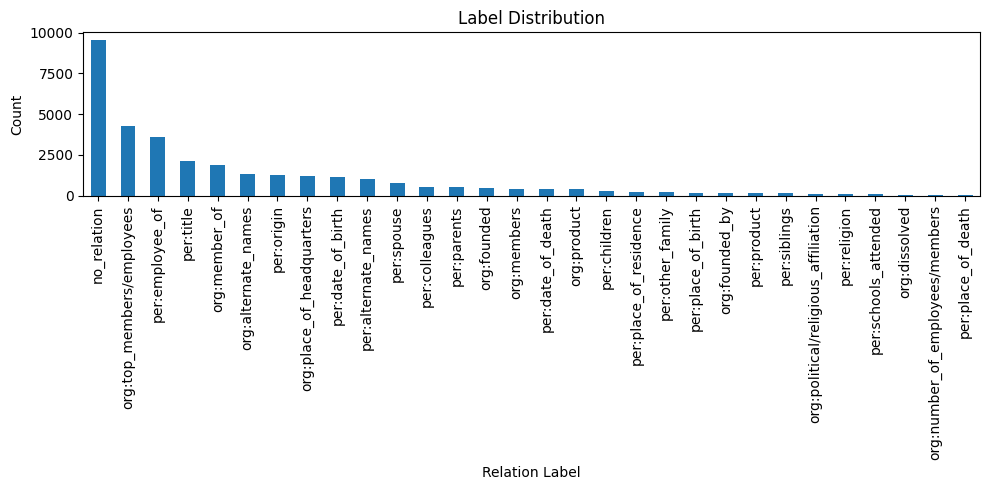

In [26]:
plt.figure(figsize=(10, 5))
label_counts.plot(kind="bar")
plt.title("Label Distribution")
plt.xlabel("Relation Label")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plots/label_distribution.png")
plt.show()
plt.close()

- 특정 라벨이 매우 적다면 focal loss 적용 또는 데이터 증강 고려
- no_relation 비율이 높다면 label smoothing 고려

In [21]:
data[data["label"]=="org:founded_by"]

,id,sentence,subject_entity,object_entity,label,source,subject_type,object_type
35,35,로버트 조지 (바비) 실(Robert George (Bobby)(Bobby) Sea...,"{'word': '흑표당', 'start_idx': 99, 'end_idx': 10...","{'word': '휴이 뉴튼', 'start_idx': 89, 'end_idx': ...",org:founded_by,wikipedia,ORG,PER
234,234,커널 샌더스(Colonel Sanders)로 널리 알려져 있는 할랜드 데이비드 샌더...,"{'word': 'KFC', 'start_idx': 78, 'end_idx': 80...","{'word': '커널 샌더스', 'start_idx': 0, 'end_idx': ...",org:founded_by,wikipedia,ORG,PER
459,459,1992년에는 에두아르드 리모노프와 알렉산드르 두긴을 중심으로 국민볼셰비키당이 창당...,"{'word': '국민볼셰비키당', 'start_idx': 35, 'end_idx'...","{'word': '에두아르드 리모노프', 'start_idx': 8, 'end_id...",org:founded_by,wikipedia,ORG,PER
616,616,"함연지 씨는 오뚜기 창업주인 함태호 명예회장의 손녀로, 뮤지컬 배우로 활동하고 있다.","{'word': '오뚜기', 'start_idx': 7, 'end_idx': 9, ...","{'word': '함태호', 'start_idx': 16, 'end_idx': 18...",org:founded_by,wikitree,ORG,PER
679,679,"마이크로 센터는 1979년 35,000 달러의 투자금과 함께 라디오셱의 전 직원이었...","{'word': '마이크로 센터', 'start_idx': 0, 'end_idx':...","{'word': '빌 베인', 'start_idx': 55, 'end_idx': 5...",org:founded_by,wikipedia,ORG,PER
...,...,...,...,...,...,...,...,...
30408,30408,삼성그룹 분가 과정에서 1995년 삼성그룹 창업주였던 고 이병철 회장의 2남인 고 ...,"{'word': '삼성그룹', 'start_idx': 19, 'end_idx': 2...","{'word': '이병철', 'start_idx': 32, 'end_idx': 34...",org:founded_by,wikipedia,ORG,PER
30474,30474,현대그룹의 사업확장이 거둔 성공은 현대 그룹에 탄탄한 자금력을 가져다 주었음은 물론...,"{'word': '현대 그룹', 'start_idx': 19, 'end_idx': ...","{'word': '정주영', 'start_idx': 96, 'end_idx': 98...",org:founded_by,wikipedia,ORG,PER
30739,30739,"2013년 11월, 안철수는 신당 창당을 목표로 국민과 함께하는 새정치 추진위원회(...","{'word': '새정치 추진위원회', 'start_idx': 36, 'end_id...","{'word': '안철수', 'start_idx': 11, 'end_idx': 13...",org:founded_by,wikipedia,ORG,PER
31456,31456,카카오 창업자인 김범수 카카오 이사회 의장이 코로나19 극복을 위해 20억원 상당의...,"{'word': '카카오', 'start_idx': 0, 'end_idx': 2, ...","{'word': '김범수', 'start_idx': 9, 'end_idx': 11,...",org:founded_by,wikitree,ORG,PER


In [23]:
data[data["label"]=="per:place_of_birth"]

,id,sentence,subject_entity,object_entity,label,source,subject_type,object_type
91,91,"백한성(白漢成, 水原鶴人, 1899년 6월 15일 조선 충청도 공주 출생 ~ 197...","{'word': '백한성', 'start_idx': 0, 'end_idx': 2, ...","{'word': '조선 충청도 공주', 'start_idx': 28, 'end_id...",per:place_of_birth,wikipedia,PER,LOC
774,774,코치시 졸탄(1952년 5월 30일 ~ 2016년 11월 6일)은 헝가리 태생의 피...,"{'word': '코치시 졸탄', 'start_idx': 0, 'end_idx': ...","{'word': '헝가리', 'start_idx': 37, 'end_idx': 39...",per:place_of_birth,wikipedia,PER,LOC
1105,1105,"윤호중은 경기도 장단군 출신으로, 배재고등보통학교에서 미술 교사였던 조각가 김복진에...","{'word': '윤호중', 'start_idx': 0, 'end_idx': 2, ...","{'word': '경기도', 'start_idx': 5, 'end_idx': 7, ...",per:place_of_birth,wikipedia,PER,LOC
1110,1110,토미 메이컴은 북아일랜드 카운티 아마의 키디에서 1932년에 태어났다.,"{'word': '토미 메이컴', 'start_idx': 0, 'end_idx': ...","{'word': '북아일랜드 카운티 아마', 'start_idx': 8, 'end_...",per:place_of_birth,wikipedia,PER,LOC
1300,1300,빌리 오르반은 독일 카이저슬라우테른에서 헝가리인 아버지와 폴란드인 어머니 사이에서 ...,"{'word': '빌리 오르반', 'start_idx': 0, 'end_idx': ...","{'word': '카이저슬라우테른', 'start_idx': 11, 'end_idx...",per:place_of_birth,wikipedia,PER,LOC
...,...,...,...,...,...,...,...,...
31936,31936,본관은 성주(星州)이고 호(號)는 산남(山南)이며 영어 이름은 토머스 도(Thoma...,"{'word': '토머스 도', 'start_idx': 35, 'end_idx': ...","{'word': '성주(星州)', 'start_idx': 4, 'end_idx': ...",per:place_of_birth,wikipedia,PER,LOC
32025,32025,루자인 알하틀룰은 2015년 12월에 사우디아라비아 역사상 최초로 여성이 선거권을 ...,"{'word': '루자인 알하틀룰', 'start_idx': 0, 'end_idx'...","{'word': '사우디아라비아', 'start_idx': 21, 'end_idx'...",per:place_of_birth,wikipedia,PER,LOC
32162,32162,1946년 평안북도 진남포 (현재의 남포특별시)라고 알려져 있지만 공식적으로 평안남...,"{'word': '하용조', 'start_idx': 67, 'end_idx': 69...","{'word': '평안남도 강서군', 'start_idx': 43, 'end_idx...",per:place_of_birth,wikipedia,PER,LOC
32204,32204,"툰쿠 압둘 라만은 1903년 2월 8일, 말레이시아의 알로르스타르에서 태어났다.","{'word': '툰쿠 압둘 라만', 'start_idx': 0, 'end_idx'...","{'word': '말레이시아', 'start_idx': 23, 'end_idx': ...",per:place_of_birth,wikipedia,PER,LOC


## 1-3. 라벨별 엔티티 내부 토큰(단어) 분석

In [25]:

def parse_entity_word(entity_str):
    ent_dict = ast.literal_eval(entity_str)
    return ent_dict["word"]

def tokenize_simple(text):
    return text.split()

def find_top_words_for_class(df, target_label, top_n=20):
    df_class = df[df["label"] == target_label]
    if len(df_class) == 0:
        print(f"No samples found for label: {target_label}")
        return

    df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
    df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)

    all_entity_texts = df_class["subj_word"].tolist() + df_class["obj_word"].tolist()

    all_tokens = []
    for txt in all_entity_texts:
        toks = tokenize_simple(txt)
        all_tokens.extend(toks)

    counter = Counter(all_tokens)
    most_common = counter.most_common(top_n)

    words, freqs = zip(*most_common)
    freq_df = pd.DataFrame({"word": words, "freq": freqs})

    # 6) 시각화(barplot)
    plt.figure(figsize=(8, 4))
    sns.barplot(data=freq_df, x="freq", y="word", color="skyblue")
    plt.title(f"Top {top_n} Words in Entities for Label: {target_label}")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.savefig(f"plots/{target_label}_top_words.png")
    plt.show()
    plt.close()
    return freq_df

/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


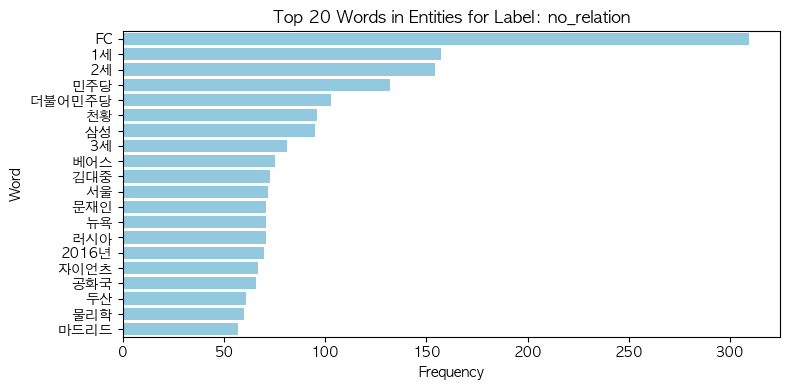

0.29362488450877733


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


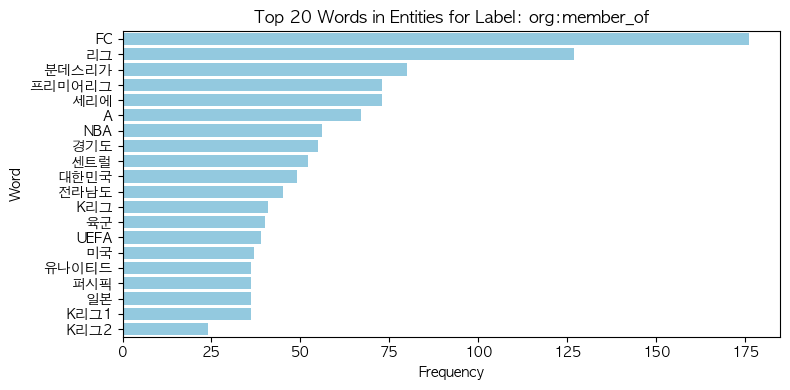

0.05746843239913767


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


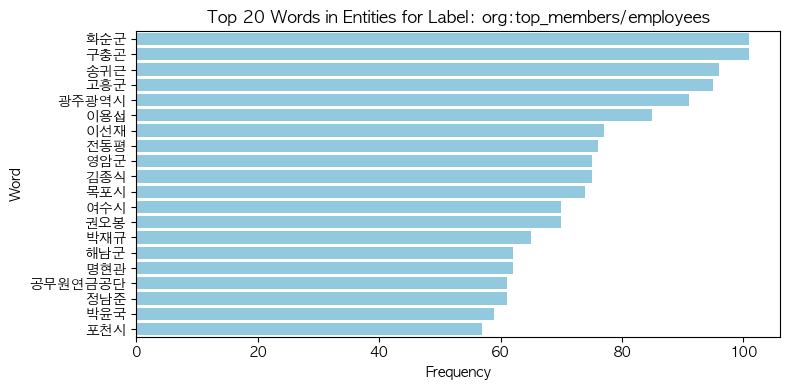

/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


0.1319371727748691


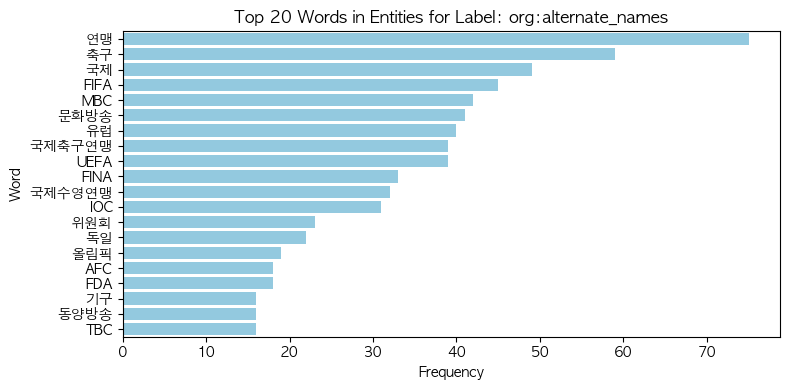

0.04065291037881121


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


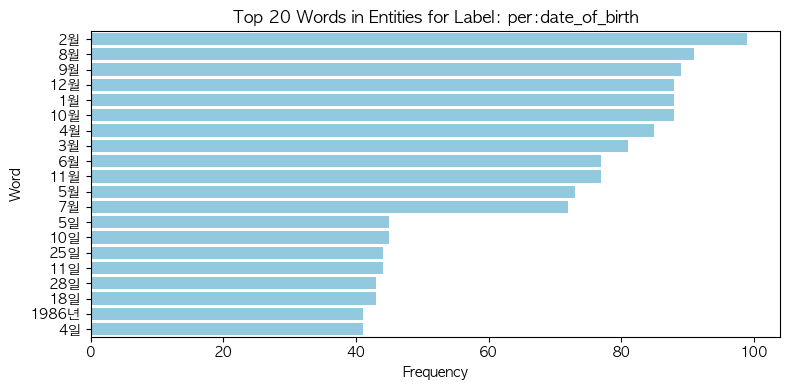

0.034801355097012626


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


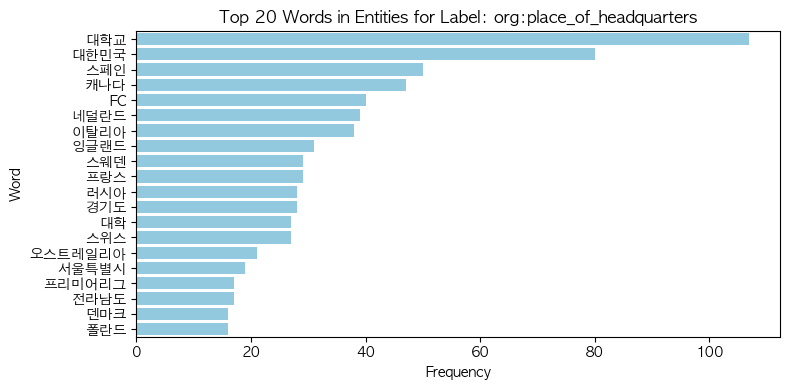

0.0368032029565753


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


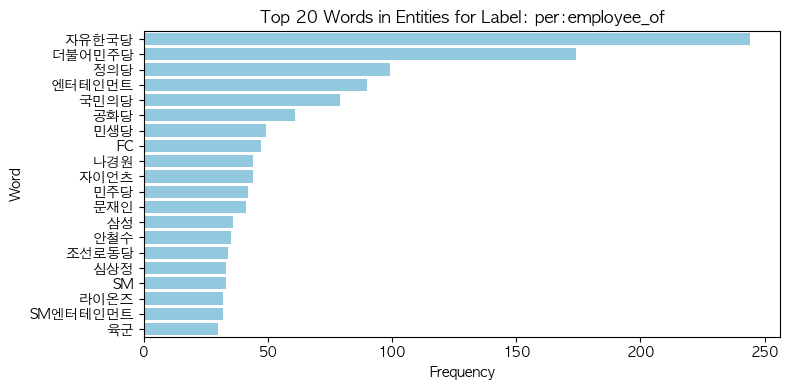

/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


0.11004003695719125


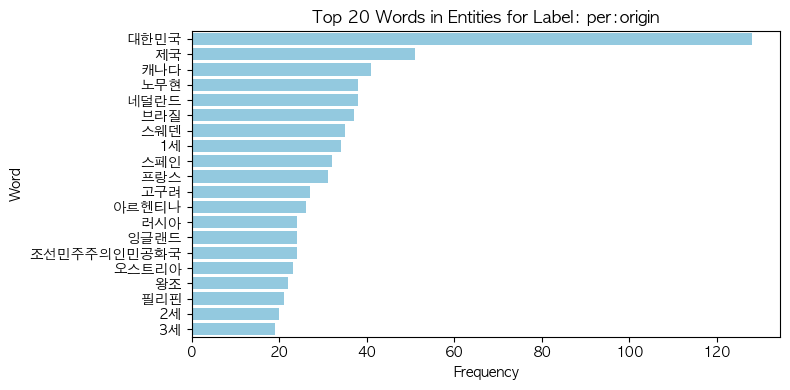

0.038004311672312906


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


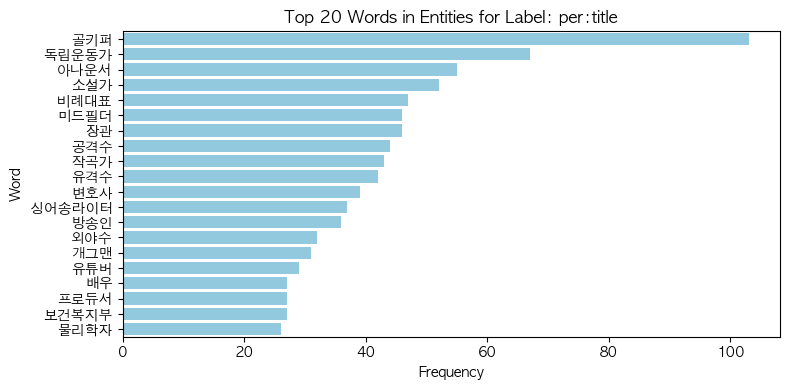

0.06476747767169695


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


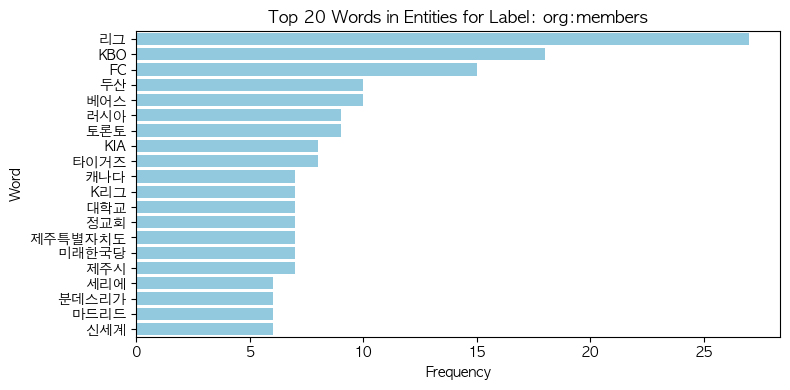

0.012935016938712659


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


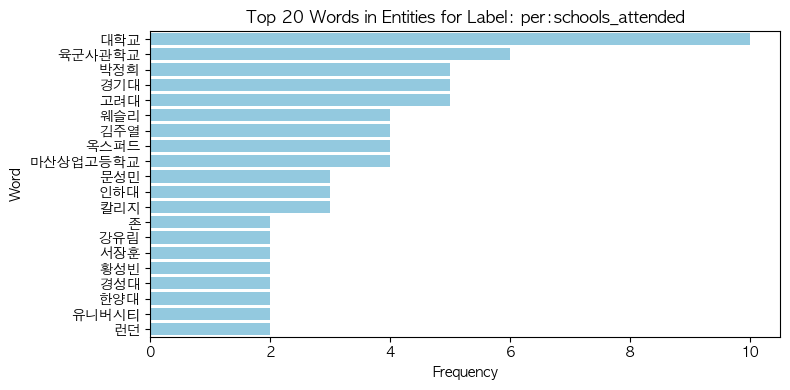

/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


0.002525408068986757


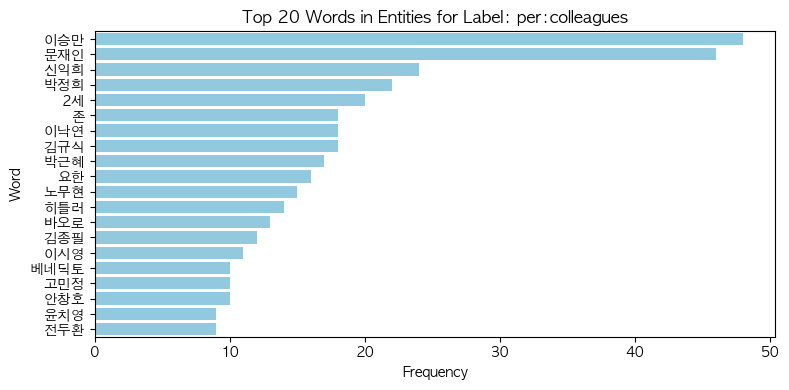

0.016445950107791808


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


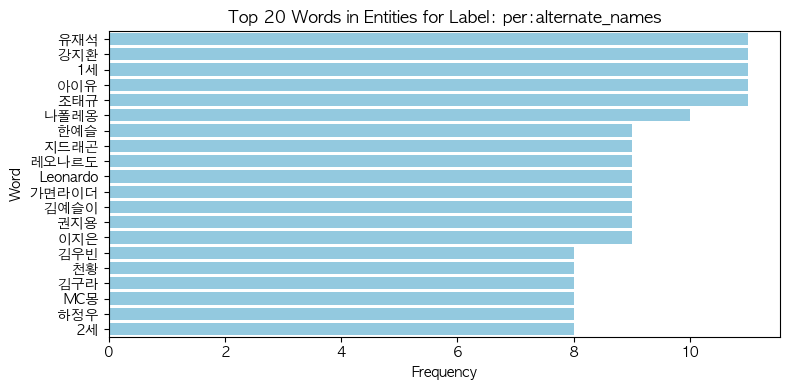

0.030828457037265167


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


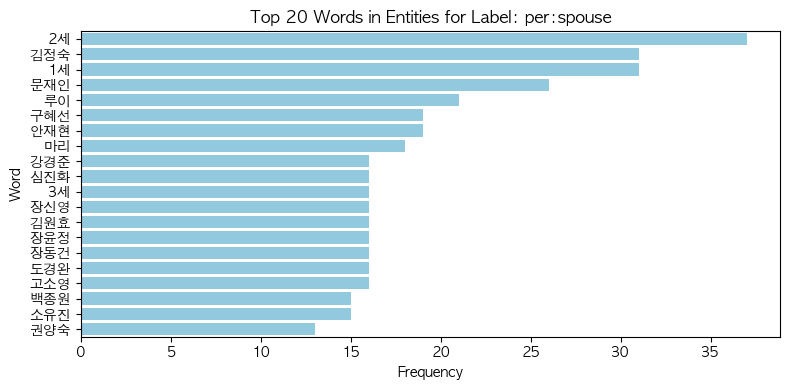

/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


0.024484139205420388


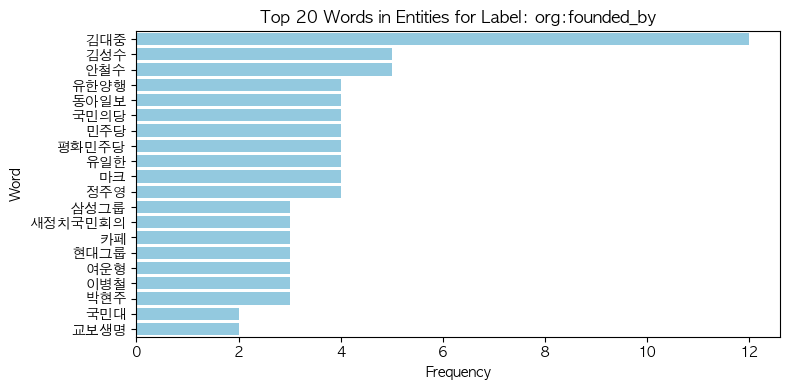

0.0047736372035725285


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


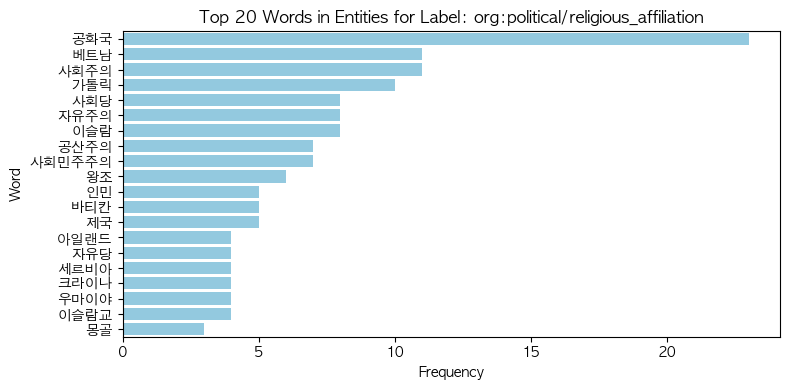

0.0030181706190329535


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


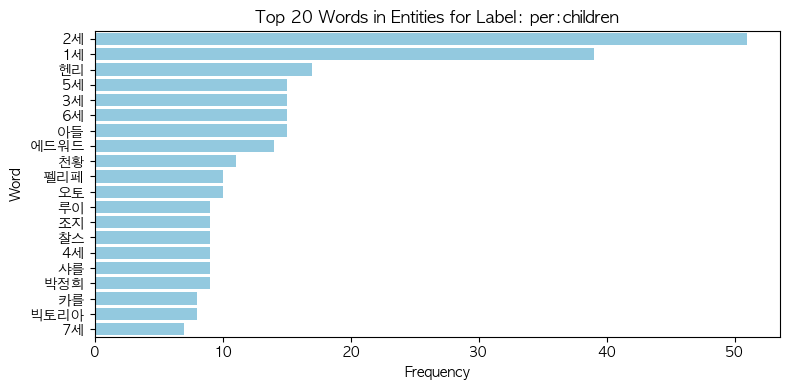

0.009362488450877733


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


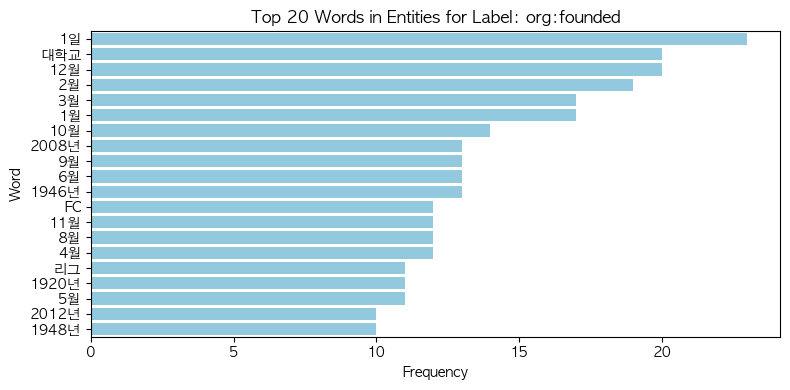

0.013858946720049276


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


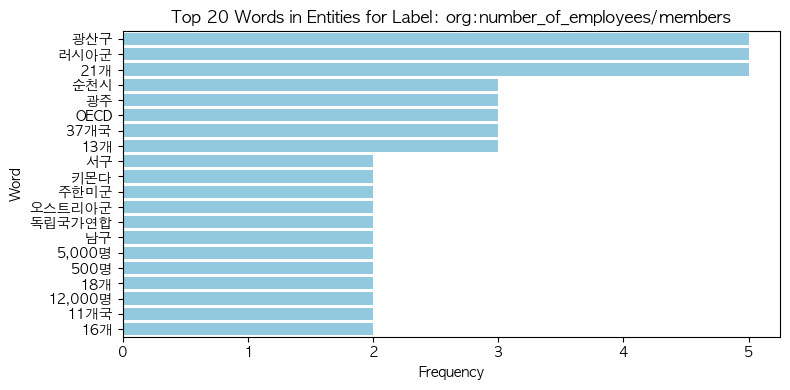

0.0014782876501385895


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


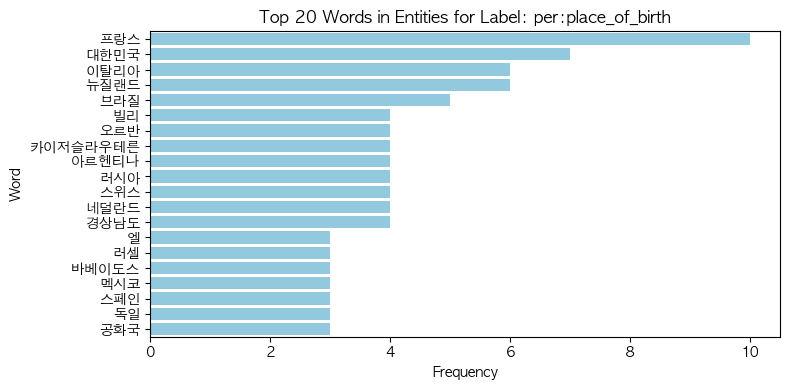

0.005112411456729289


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


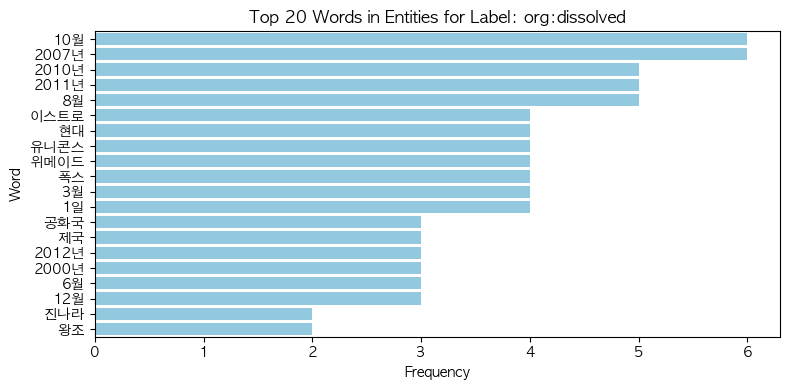

0.0020326455189405607


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


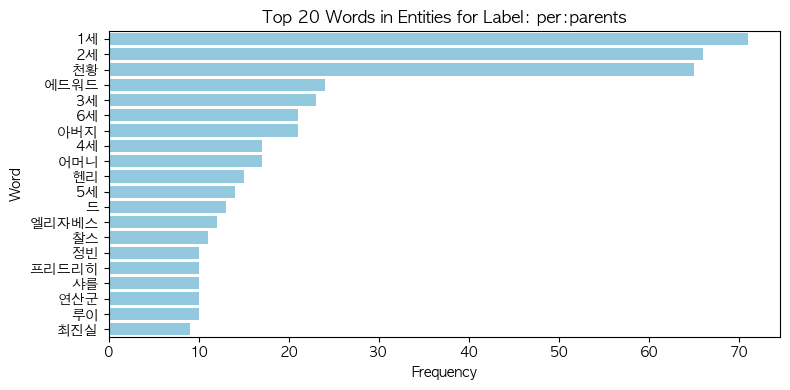

0.016014782876501387


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


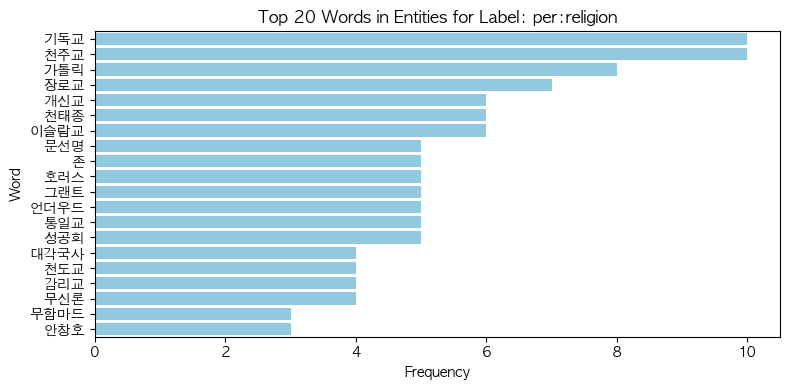

0.002956575300277179


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


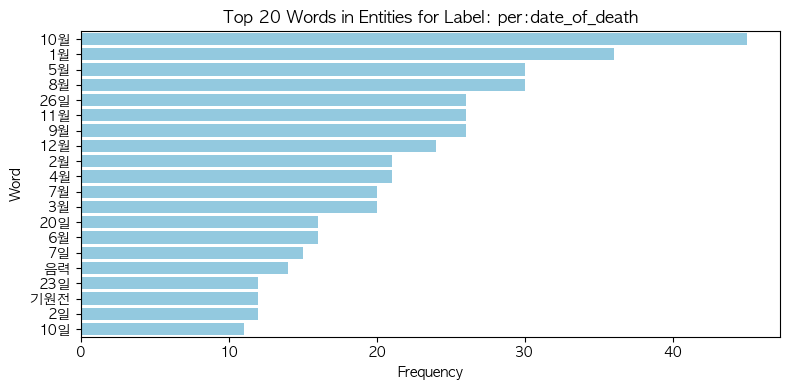

0.012873421619956884


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


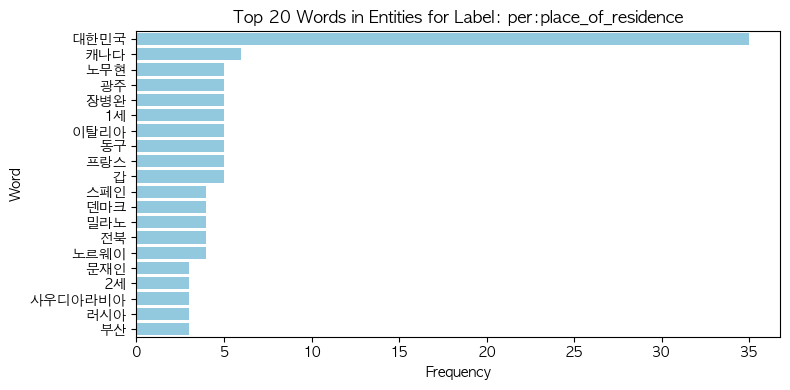

0.005943948259932245


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


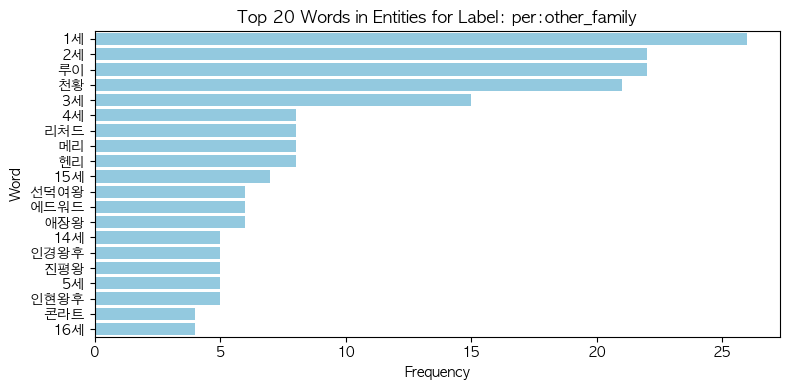

0.005851555281798583


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


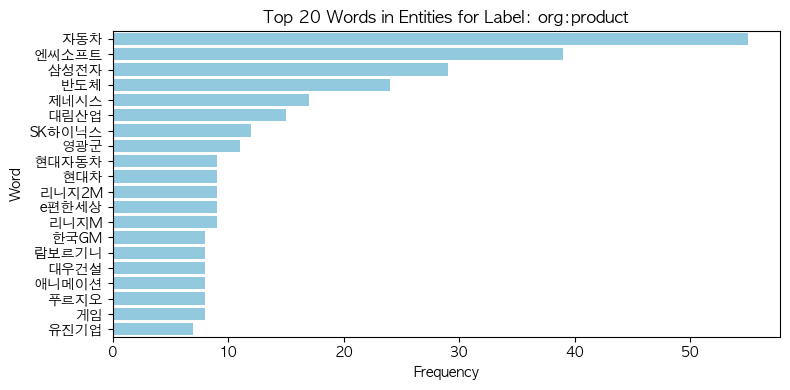

0.011703110563597166


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


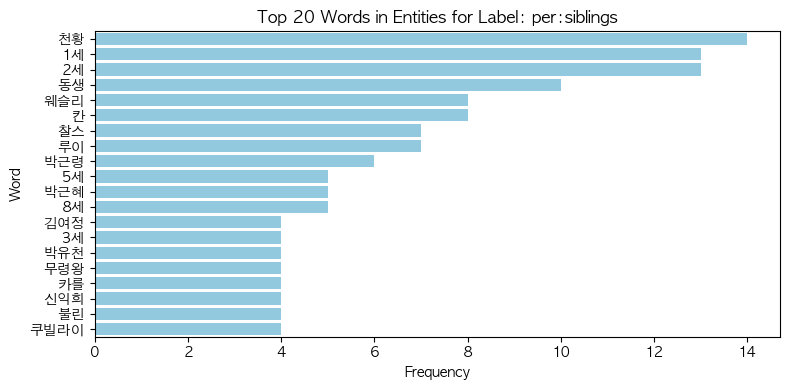

0.004188481675392671


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


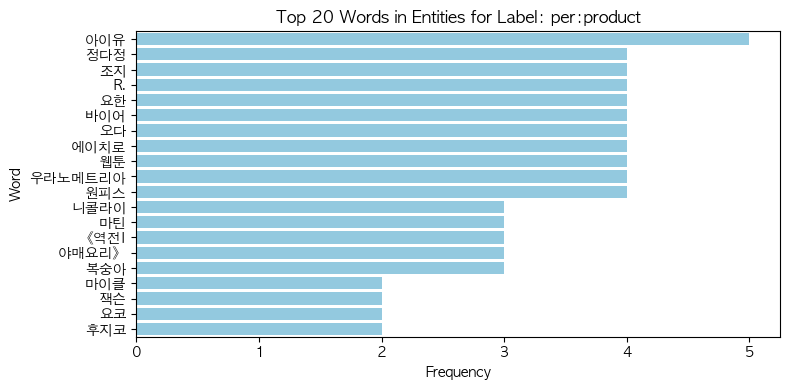

0.004280874653526332


/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["subj_word"] = df_class["subject_entity"].apply(parse_entity_word)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_49238/4054216874.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["obj_word"]  = df_class["object_entity"].apply(parse_entity_word)


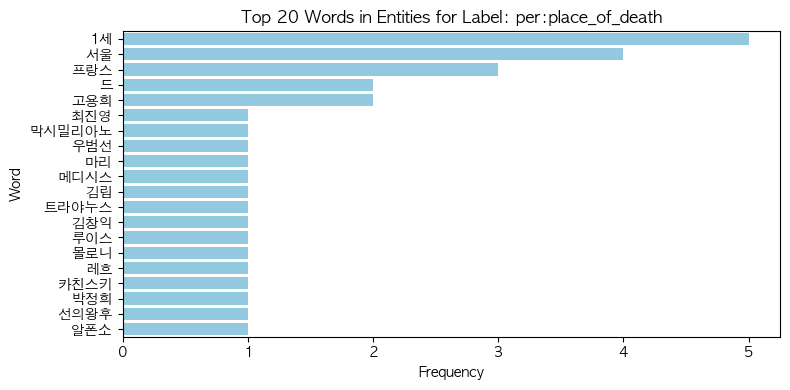

0.0012319063751154912


In [31]:
for label in data["label"].unique():
    find_top_words_for_class(data, label)
    print(label_ratios[label])


## 1-4. 문장 길이 분석

In [14]:
data["sent_len"] = data["sentence"].apply(len)
print(data["sent_len"].describe())

count    32470.000000
mean        97.083954
std         47.939902
min         14.000000
25%         64.000000
50%         87.000000
75%        118.000000
max        455.000000
Name: sent_len, dtype: float64


In [15]:
len(data[data["sent_len"] > 128]) / len(data)

0.19565753002771788

### 시각화

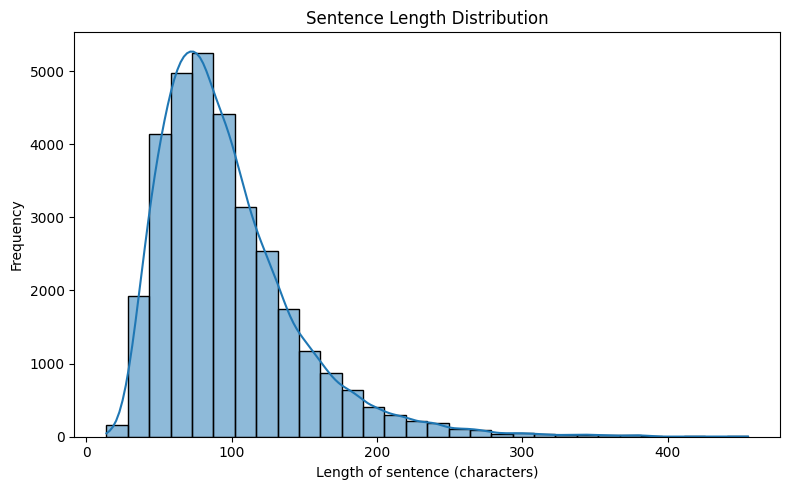

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(data["sent_len"], bins=30, kde=True)
plt.title("Sentence Length Distribution")
plt.xlabel("Length of sentence (characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("plots/sentence_length_distribution.png")
plt.show()
plt.close()

- 평균보다 훨씬 긴 문장 많으면 max_length 조정 필요


## 1-5. 엔티티 타입 분포 분석

In [18]:
import ast
data["subject_entity"] = data["subject_entity"].apply(ast.literal_eval)
data["object_entity"] = data["object_entity"].apply(ast.literal_eval)
data["subject_type"] = data["subject_entity"].apply(lambda x: x["type"])
data["object_type"] = data["object_entity"].apply(lambda x: x["type"])

In [49]:
print(data["subject_type"].value_counts())

subject_type
PER    16786
ORG    15684
Name: count, dtype: int64


In [50]:
print(data["object_type"].value_counts())

object_type
PER    9788
ORG    9346
POH    5113
DAT    4249
LOC    3561
NOH     413
Name: count, dtype: int64


### 시각화

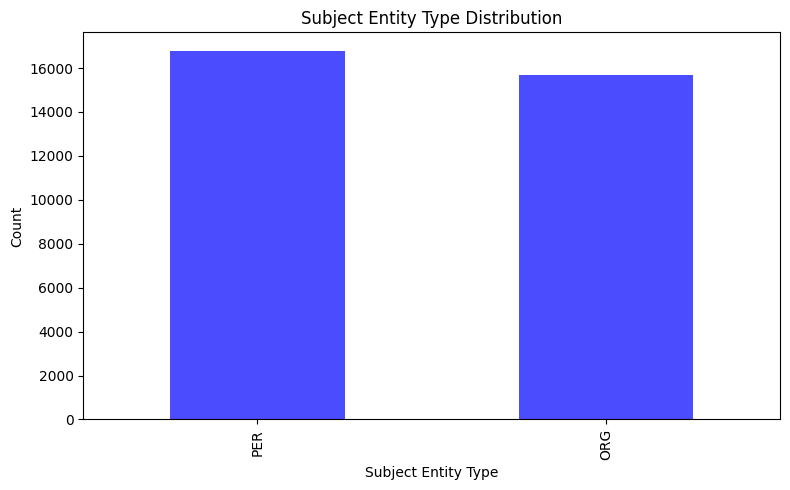

In [51]:
plt.figure(figsize=(8, 5))
data["subject_type"].value_counts().plot(kind="bar", color="blue", alpha=0.7)
plt.title("Subject Entity Type Distribution")
plt.xlabel("Subject Entity Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plots/subject_type_distribution.png")
plt.show()
plt.close()

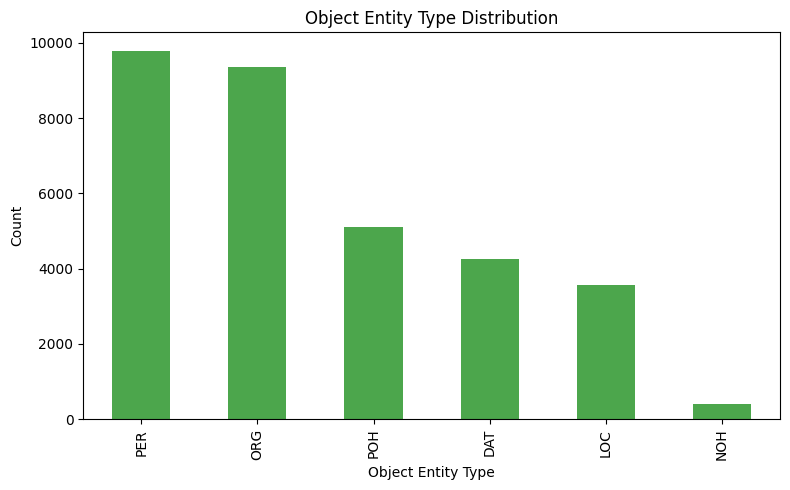

In [52]:
plt.figure(figsize=(8, 5))
data["object_type"].value_counts().plot(kind="bar", color="green", alpha=0.7)
plt.title("Object Entity Type Distribution")
plt.xlabel("Object Entity Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plots/object_type_distribution.png")
plt.show()
plt.close()

- 특정 엔티티 타입이 지배적이면, 모델이 해당 타입 패턴에 과적합할 수 있음
- 다양한 엔티티 타입이 고르게 분포한다면 타입 관련 generalization 가능성 높음

## 1-5. 관계-엔티티 타입 Co-occurrence 분석

In [53]:
relation_type_pairs = data.groupby(["subject_type", "object_type"])["label"].count().unstack(fill_value=0)

In [55]:
relation_type_pairs

object_type,DAT,LOC,NOH,ORG,PER,POH
subject_type,,,,,,
ORG,2110,1776,260,5100,4779,1659
PER,2139,1785,153,4246,5009,3454


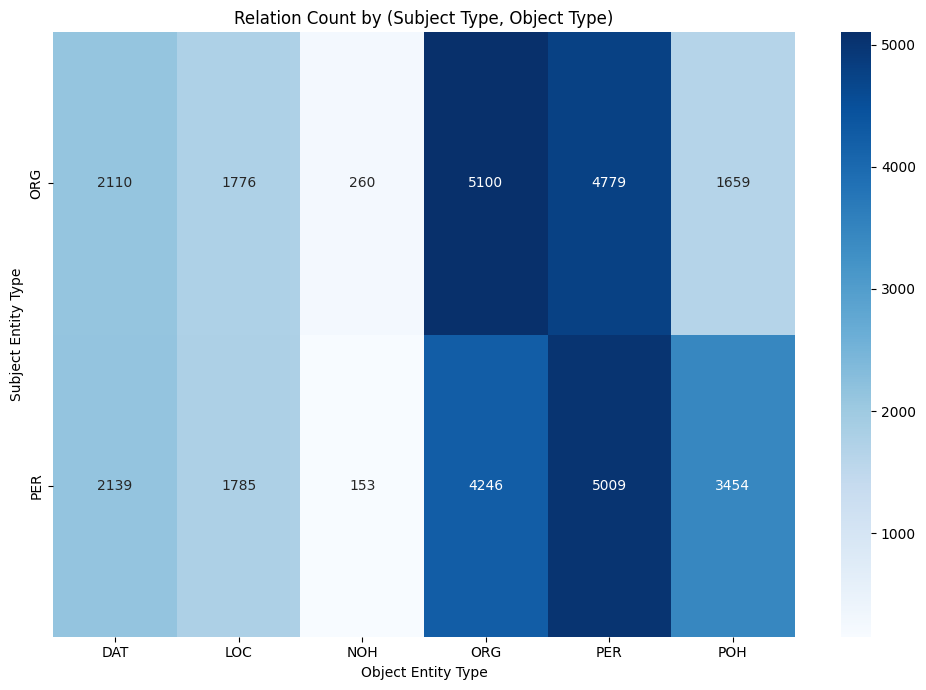

In [56]:
plt.figure(figsize=(10, 7))
sns.heatmap(relation_type_pairs, annot=True, fmt="d", cmap="Blues")
plt.title("Relation Count by (Subject Type, Object Type)")
plt.xlabel("Object Entity Type")
plt.ylabel("Subject Entity Type")
plt.tight_layout()
plt.savefig("plots/relation_type_coocurrence.png")
plt.show()
plt.close()

- 특정 (subject_type, object_type) 조합에서 특정 관계가 주로 발생한다면 모델이 타입 기반 힌트를 활용할 수 있음.
- 이 정보는 엔티티 타입 정보나 마커 사용 시 도움이 됨

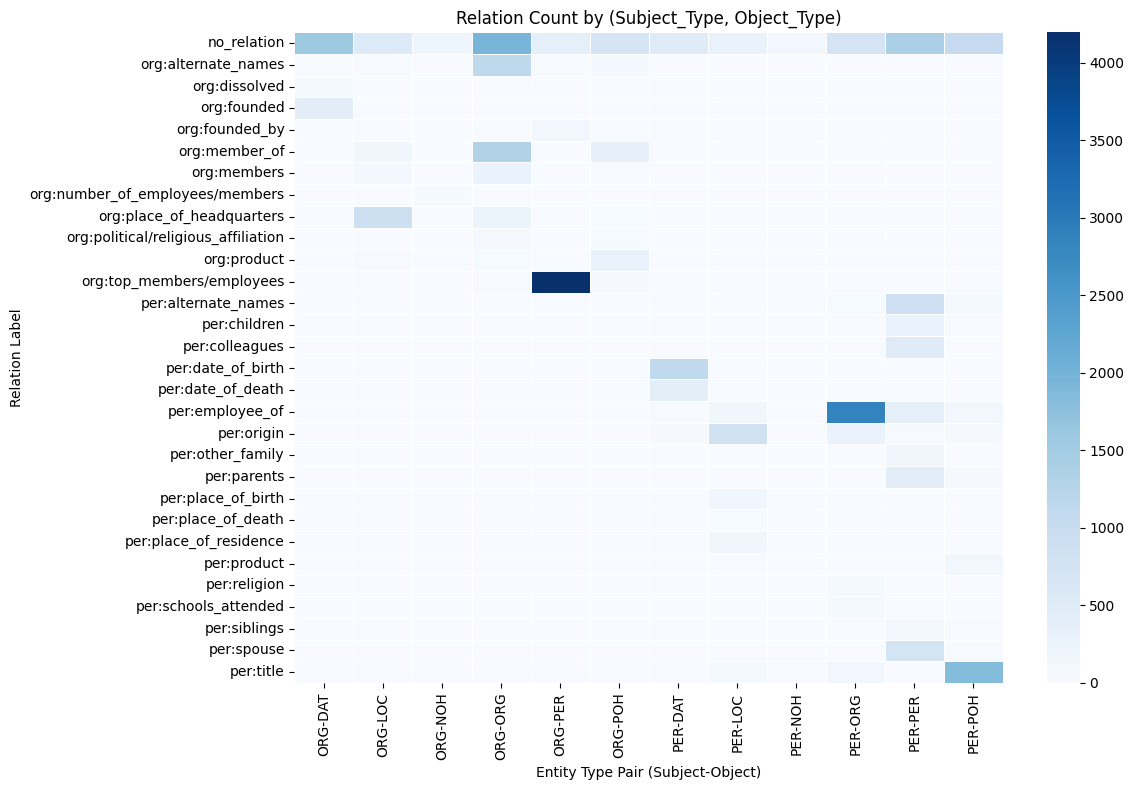

In [26]:
from collections import defaultdict

rel_type_counts = defaultdict(lambda: defaultdict(int))

subject_types = set()
object_types = set()
relations = set()

for item in data.to_dict(orient="records"):
    rel = item['label']
    s_type = item['subject_entity']['type']
    o_type = item['object_entity']['type']

    relations.add(rel)
    subject_types.add(s_type)
    object_types.add(o_type)

    rel_type_counts[rel][(s_type, o_type)] += 1

subject_types = sorted(list(subject_types))
object_types = sorted(list(object_types))
relations = sorted(list(relations))

type_pairs = []
for s_t in subject_types:
    for o_t in object_types:
        type_pairs.append((s_t, o_t))

matrix = []
for rel in relations:
    row = []
    for (s_t, o_t) in type_pairs:
        count = rel_type_counts[rel][(s_t, o_t)]
        row.append(count)
    matrix.append(row)

type_cols = [f"{s_t}-{o_t}" for s_t, o_t in type_pairs]
df = pd.DataFrame(matrix, index=relations, columns=type_cols)

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=False, cmap='Blues', linewidths=0.5)
plt.title("Relation Count by (Subject_Type, Object_Type)")
plt.xlabel("Entity Type Pair (Subject-Object)")
plt.ylabel("Relation Label")
plt.tight_layout()
plt.savefig("plots/relation_type_heatmap.png")
plt.show()
plt.close()

- 토크나이징 결과 평균 토큰 수 확인 후 max_length 설정에 참고
- 엔티티가 서브워드로 과도하게 분리되는지 확인해 필요 시 엔티티를 스페셜 토큰으로 감싸 모델이 명확한 범위 인식 가능 (이미 [E1], [E2] 사용 계획 반영 )

- 특정 관계는 주로 엔티티가 가까운 곳에서 발생하는지, 멀리 떨어져 있는지 파악 가능
멀리 떨어진 엔티티 관계 인식이 어려울 수 있으므로, 모델 성능 개선 필요 시 (예: 더 정교한 attention 또는 position embedding 개선 등)

**EDA를 통해 얻은 인사이트를 어떻게 활용할 수 있는지에 대한 정리**

1. Label 불균형 : 특정 label의 데이터 수가 매우 적다면, focal loss로 어려운 샘플 가중치를 높임
no relation 비중이 높다면, label smoothing으로 모델이 no_relation에 확신 가지지 않도록 조정

2. 문장 길이 : 평균 길이와 최대 길이 참고, max_length를 이 근처로 설정.
너무 긴 경우 hard truncation 피해를 위해 max_length 증가 고려

3. 엔티티 타입 분포 및 Co-occurrence:
 특정 타입 조합에서만 나타나는 관계가 있다면, 모델이 타입 정보 주목 시 성능 향상 가능
 entity marker 외에 엔티티 타입 삽입 고려 (ex. [E1-ORG], [E2-PER]) 또는 feature 추가

4. 엔티티 내부 토큰 분석: 
특정 라벨에서 자주 나오는 토큰(단어)이 확인된다면, span pooling 사용이 도움이 될 것으로 예상

In [1]:
import math

def compute_label_smoothing_factor(label_counts, base_min=0.05, base_max=0.2):
    """
    라벨 빈도 사전(label_counts)을 받아 label smoothing 파라미터를 동적으로 결정.
    - label_counts: {label: count} 형태의 dict
    - base_min: 최소 smoothing 값
    - base_max: 최대 smoothing 값

    아이디어:
    1) 전체 라벨 수 N = sum(count)
    2) 각 라벨 비율 p_i = count_i / N
    3) 엔트로피 H = -sum(p_i * log(p_i))
    4) 최대 엔트로피 = log(K) (K는 클래스 수)
    5) 정규화 엔트로피 = H / log(K)
       - 정규화 엔트로피가 1에 가까울수록 분포가 고르게 퍼져 있고, 0에 가까울수록 불균형 심함.
    6) smoothing = base_max - (base_max - base_min)*정규화엔트로피
       - 정규화 엔트로피가 낮을수록(불균형 클수록) smoothing값은 base_max에 가까워짐.
    """
    counts = list(label_counts.values())
    total = sum(counts)
    p = [c/total for c in counts]

    # 엔트로피 계산
    entropy = 0.0
    for pi in p:
        if pi > 0:
            entropy -= pi * math.log(pi)

    K = len(counts)
    max_entropy = math.log(K)
    normalized_entropy = entropy / max_entropy

    # normalized_entropy가 1일 때 smoothing = base_min,
    # normalized_entropy가 0일 때 smoothing = base_max로 설정
    smoothing = base_max - (base_max - base_min) * normalized_entropy
    return smoothing

label_counts = {
    'no_relation': 9534,
    'org:top_members/employees': 4284,
    'per:employee_of': 3573,
    'per:title': 2103,
    'org:member_of': 1866,
    'org:alternate_names': 1320,
    'per:origin': 1234,
    'org:place_of_headquarters': 1195,
    'per:date_of_birth': 1130,
    'per:alternate_names': 1001,
    'per:spouse': 795,
    'per:colleagues': 534,
    'per:parents': 520,
    'org:founded': 450,
    'org:members': 420,
    'per:date_of_death': 418,
    'org:product': 380,
    'per:children': 304,
    'per:place_of_residence': 193,
    'per:other_family': 190,
    'per:place_of_birth': 166,
    'org:founded_by': 155,
    'per:product': 139,
    'per:siblings': 136,
    'org:political/religious_affiliation': 98,
    'per:religion': 96,
    'per:schools_attended': 82,
    'org:dissolved': 66,
    'org:number_of_employees/members': 48,
    'per:place_of_death': 40
}

computed_smoothing = compute_label_smoothing_factor(label_counts)
print("Computed Label Smoothing:", computed_smoothing)

Computed Label Smoothing: 0.0878460774968498
